In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

2017-06-29 11:40:07


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [12]:
from invisible_cities.database import load_db

import invisible_cities.sierpe.blr as blr

import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.reco.peak_functions as pf
import invisible_cities.reco.peak_functions_c as cpf

from   invisible_cities.reco.params           import S12Params 
from   invisible_cities.reco.params           import CalibVectors
from   invisible_cities.reco.params           import DeconvParams
from   invisible_cities.reco.params           import ThresholdParams
from   invisible_cities.reco.event_model   import SensorParams
from   invisible_cities.core.system_of_units_c import units
from   invisible_cities.core.ic_types import minmax
import invisible_cities.icaro.mpl_functions as mpl
from invisible_cities.icaro.pmaps_mpl import plot_s12


In [45]:
import  invisible_cities.icaro.mpl_functions as mpl
import   invisible_cities.reco.sensor_functions as sf       
from     invisible_cities.reco     import wfm_functions as wfm

In [24]:
from invisible_cities.sierpe   import blr

In [5]:
import invisible_cities.reco.event_model as evm
from invisible_cities.core.ic_types import minmax

In [6]:
from invisible_cities.core.exceptions        import SipmEmptyList
from invisible_cities.core.exceptions        import SipmNotFound
from invisible_cities.core.exceptions        import PeakNotFound

In [7]:
run_number = 0
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values
pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist()

In [8]:
channel_id = DataPMT.ChannelID.values
coeff_blr = abs(DataPMT.coeff_blr.values)
coeff_c = abs(DataPMT.coeff_c .values)
adc_to_pes = abs(DataPMT.adc_to_pes.values)
adc_to_pes_sipm = abs(DataSiPM.adc_to_pes.values)

In [10]:
from invisible_cities.sierpe             import fee as FE

In [18]:
event=0

In [49]:
filename = '/Users/jjgomezcadenas/Projects/ICDATA/MC/cs_rwf_1000.root.h5'
h5in = tb.open_file(filename, "r") 
_, pmtrd, sipmrd = tbl.get_rd_vectors(h5in)
_, NPMT,   PMTWL = pmtrd .shape
_, NSIPM, SIPMWL = sipmrd.shape
PMTWL_FEE = int(PMTWL // FE.t_sample)
sp = SensorParams(NPMT, PMTWL_FEE, NSIPM, SIPMWL)

NoSuchNodeError: group ``/`` does not have a child named ``pmtrd``

In [15]:
print(sp)

####################
SensorParams
####################
npmt: 12
pmtwl: 48000
nsipm: 1792
sipmwl: 1200



In [19]:
dataPMT, blrPMT = sf.simulate_pmt_response(event, pmtrd, adc_to_pes)

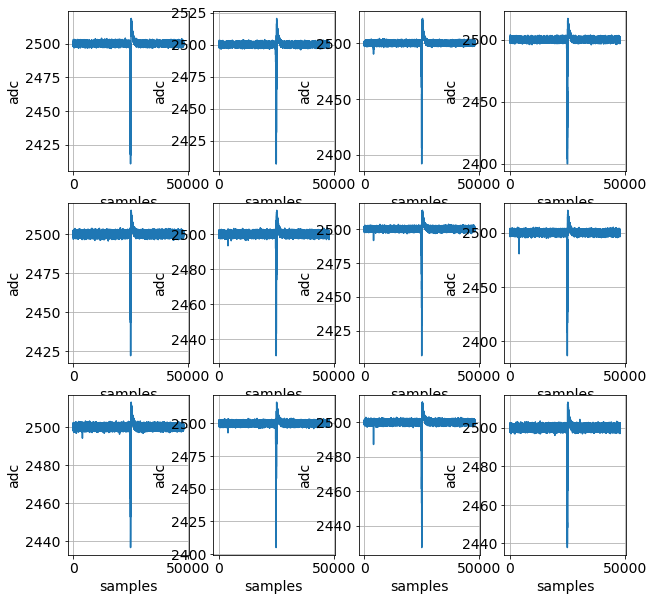

In [20]:
mpl.plot_pmt_waveforms(dataPMT, zoom=False, window_size=1200, figsize=(10,10))

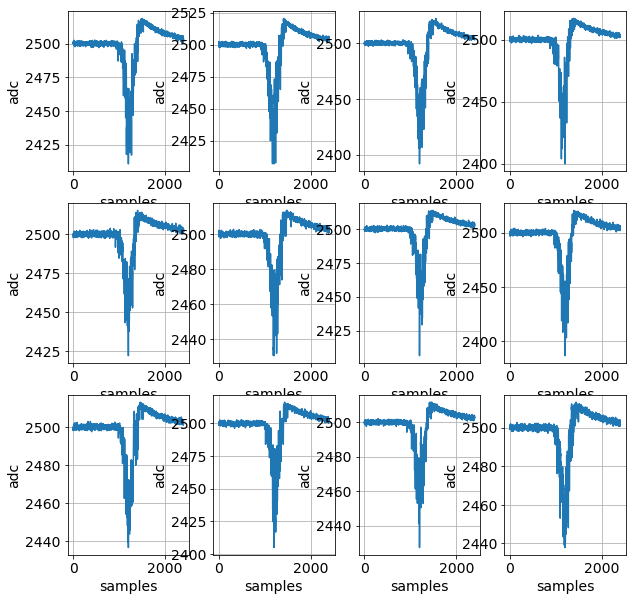

In [22]:
mpl.plot_pmt_waveforms(dataPMT, zoom=True, window_size=1200, figsize=(10,10))

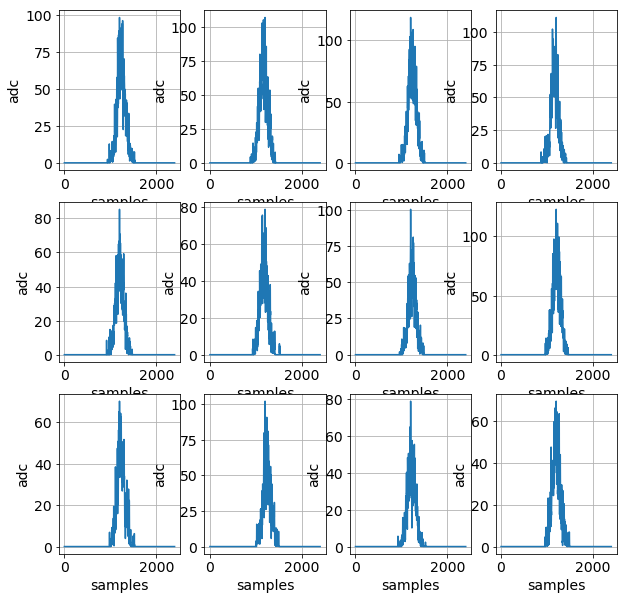

In [23]:
mpl.plot_pmt_waveforms(blrPMT, zoom=True, window_size=1200, figsize=(10,10))

In [37]:
RWF = dataPMT.astype(np.int16)

In [38]:
RWF.dtype

dtype('int16')

In [40]:
BLR = blrPMT

In [39]:
CWF = blr.deconv_pmt(RWF,
                     coeff_c,
                     coeff_blr,
                     pmt_active,
                     n_baseline=28000,
                     thr_trigger=5)

        

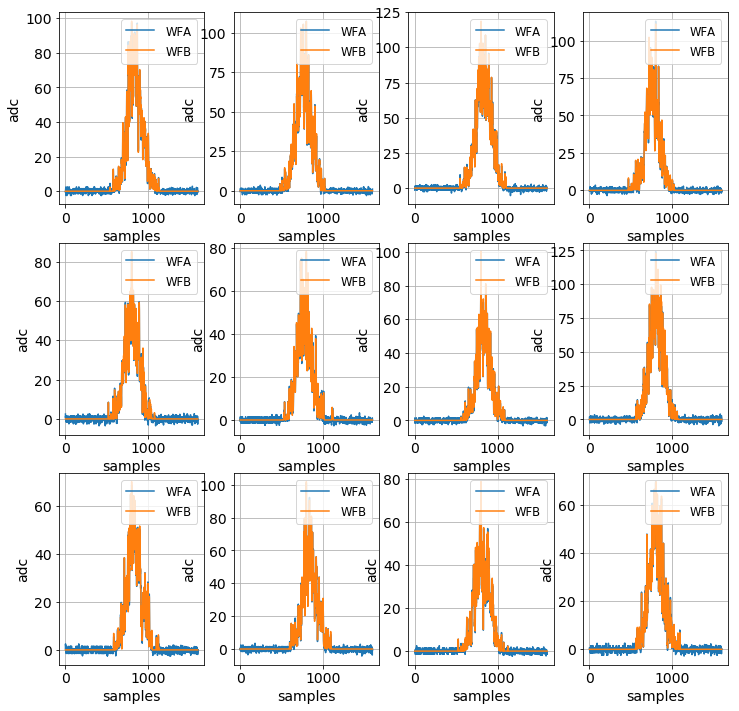

In [42]:
mpl.plot_wfa_wfb(CWF, BLR, zoom=True, window_size=800)

In [46]:
diff = wfm.compare_cwf_blr(cwf = [CWF],
                           pmtblr = [BLR],
                           event_list = [0],
                           window_size = 500)

In [47]:
diff

array([ 0.07891288,  0.10541862,  0.1314916 ,  0.07404571,  0.103638  ,
        0.07246536,  0.09092133,  0.03592035,  0.11846419,  0.12880498,
        0.12626722,  0.0850087 ])

In [48]:
np.sum(diff)

1.1513589420652404